# 🎓 Final Data Visualization: Student Performance Analyzer

This notebook presents clear, aesthetic, and insightful visualizations based on student performance data.  
We focus on patterns that influence GPA using trends, comparisons, and storytelling to draw actionable insights.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load the dataset
df = pd.read_csv('student_performance_data.csv')

# Feature engineering
df['performance_level'] = pd.cut(df['GPA'], bins=[0, 2.5, 3.5, 4.1], labels=['Low', 'Average', 'High'])
df['Study_Attendance_Ratio'] = df['StudyHoursPerWeek'] / (df['AttendanceRate'] + 1)
df['PartTimeJob'] = df['PartTimeJob'].apply(lambda x: 1 if x == 'Yes' else 0)
df['ExtraCurricularActivities'] = df['ExtraCurricularActivities'].apply(lambda x: 1 if x == 'Yes' else 0)


## 📊 Distribution of Students by Performance Level

This chart shows the number of students in each performance category, derived from GPA ranges:

- **Low**: GPA ≤ 2.5  
- **Average**: GPA between 2.5 and 3.5  
- **High**: GPA > 3.5  

It helps us understand how students are spread across performance levels.


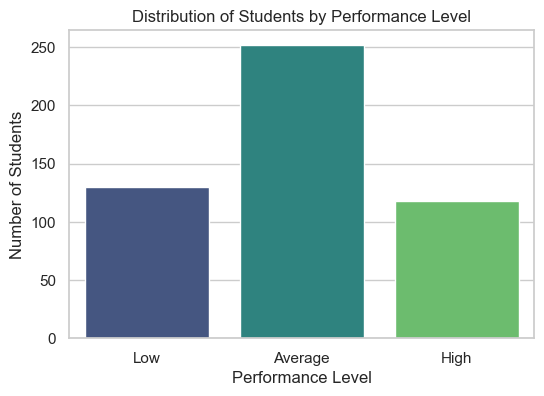

In [3]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(6, 4))
sns.countplot(x='performance_level', hue='performance_level', data=df, palette='viridis', legend=False)

plt.title('Distribution of Students by Performance Level')
plt.xlabel('Performance Level')
plt.ylabel('Number of Students')
plt.show()



## 📦 GPA, Attendance, and Study Hours – Box Plot

This boxplot helps identify distribution, central tendency, and outliers for:

- **GPA**
- **StudyHoursPerWeek**
- **AttendanceRate**

By comparing these metrics visually, we can detect how spread out students are in each area.


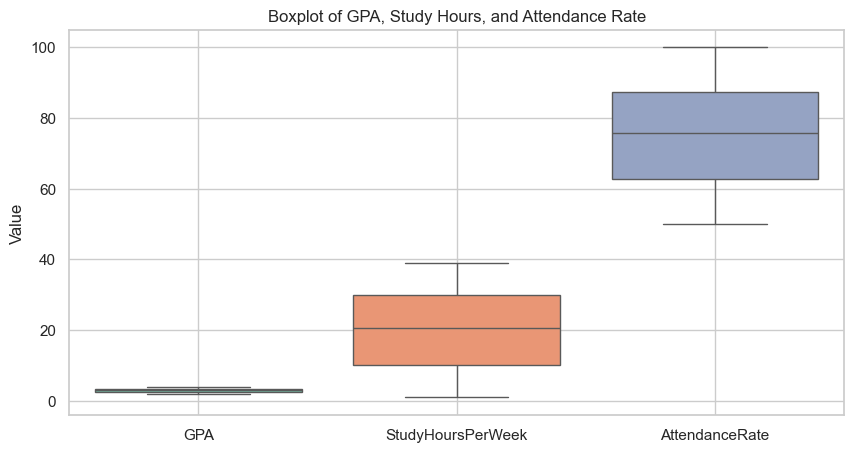

In [4]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['GPA', 'StudyHoursPerWeek', 'AttendanceRate']], palette='Set2')

plt.title('Boxplot of GPA, Study Hours, and Attendance Rate')
plt.ylabel('Value')
plt.grid(True)
plt.show()


## 📈 Study Hours vs GPA (Interactive Scatter Plot)

This interactive chart shows the relationship between how many hours a student studies and their GPA.  
Hovering reveals their attendance and major. The points are color-coded by performance level.

This helps us observe trends like:  
📌 Students who study more tend to have a higher GPA  
📌 Outliers who study less but still perform well (or vice versa)


In [5]:
fig = px.scatter(
    df,
    x='StudyHoursPerWeek',
    y='GPA',
    color='performance_level',
    hover_data=['AttendanceRate', 'Major'],
    title='Study Hours vs GPA by Performance Level'
)

fig.show()


## 🔥 GPA Distribution by Gender

This histogram compares the distribution of GPA scores between male and female students.

By examining these curves, we can explore:
- Which gender has higher GPA concentration
- If one group is more consistent or more varied in performance


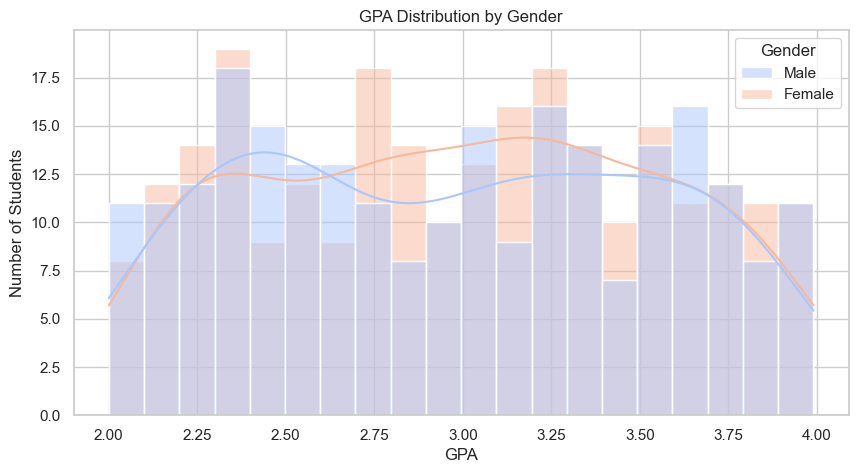

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='GPA', hue='Gender', kde=True, palette='coolwarm', bins=20)

plt.title('GPA Distribution by Gender')
plt.xlabel('GPA')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()


## 🔄 Correlation Heatmap

This heatmap visualizes how strongly numerical features are correlated.

Key insights:
- A positive correlation means both values increase together
- A negative correlation means one increases as the other decreases

We're focusing on:
- **GPA**
- **StudyHoursPerWeek**
- **AttendanceRate**
- **Study_Attendance_Ratio**


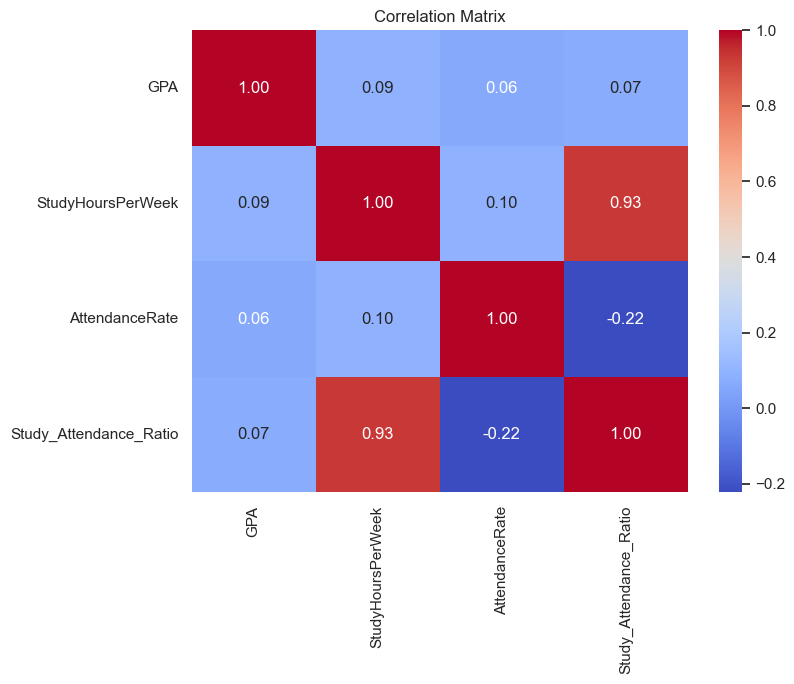

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    df[['GPA', 'StudyHoursPerWeek', 'AttendanceRate', 'Study_Attendance_Ratio']].corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)

plt.title('Correlation Matrix')
plt.show()


## 📘 Conclusion

Through this analysis, we discovered the following key takeaways:

- Students with **higher study hours** and **better attendance** tend to score higher GPAs.
- There's a **visible performance gap** in GPA across genders and majors.
- Most students fall into the **Average** performance level, with a few outliers at both extremes.
- The correlation matrix supports that **attendance and study time** have a positive impact on GPA.

---

✅ These insights can help educators and institutions target support for students who are at academic risk, and enhance performance prediction models in future work.
